In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Apocalyptic Shadow 

In [2]:
df = pd.read_csv('../data/as.csv')
firefly = df.query('team_leader == "Firefly"').copy()
firefly['pre_fugue'] = firefly['version'] <= '2.7.2'

In [3]:
core_support = ['Imaginary Trailblazer', 'Ruan Mei', 'Fugue', 'Tribbie']

for core in core_support:
    lowered_core = core.lower().replace(' ', '_')
    firefly['has_' + lowered_core] = firefly['team_comp'].str.contains(core)


In [4]:
firefly.groupby('version')['has_imaginary_trailblazer'].mean()

version
2.3.1    0.995869
2.4.1    0.997031
2.5.1    0.997623
2.6.1    0.997286
2.7.1    0.998449
3.0.1    0.497903
3.1.1    0.349616
Name: has_imaginary_trailblazer, dtype: float64

In [5]:
firefly.groupby('version')['has_sustain'].mean()

version
2.3.1    0.984458
2.4.1    0.979641
2.5.1    0.974198
2.6.1    0.952427
2.7.1    0.993625
3.0.1    0.904878
3.1.1    0.893261
Name: has_sustain, dtype: float64

## Pre-Fugue Release

In [6]:
pre_fugue = firefly.query('has_imaginary_trailblazer & has_sustain & cons == 0 & pre_fugue')
pre_fugue_e2 = firefly.query('has_imaginary_trailblazer & has_sustain & cons == 2 & pre_fugue')

Text(0.5, 1.0, "E0 Firefly's Average Performance in Apocalyptic Shadow")

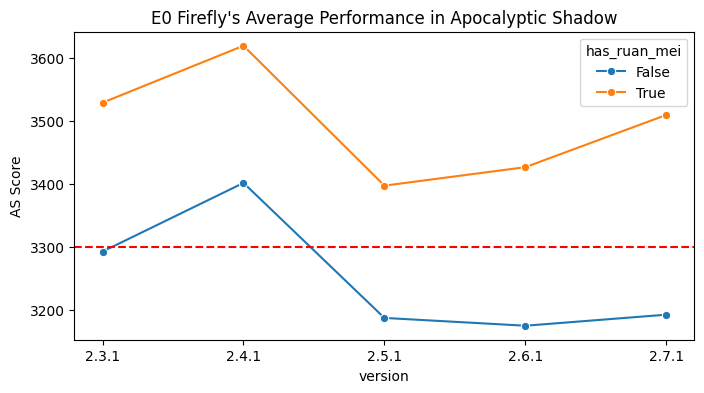

In [7]:
has_ruan_mei = pre_fugue.groupby(['version', 'has_ruan_mei'])['round_num'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x='version', y='round_num', hue='has_ruan_mei', data=has_ruan_mei, marker='o') 
plt.ylabel('AS Score')
plt.axhline(y=3300, color='red', linestyle='dashed')
plt.title("E0 Firefly's Average Performance in Apocalyptic Shadow")


Text(0.5, 1.0, "E2 Firefly's Average Performance in Apocalyptic Shadow")

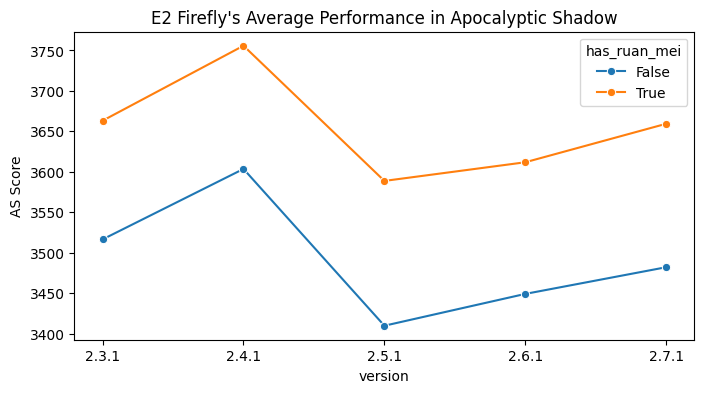

In [8]:
has_ruan_mei = pre_fugue_e2.groupby(['version', 'has_ruan_mei'])['round_num'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x='version', y='round_num', hue='has_ruan_mei', data=has_ruan_mei, marker='o') 
plt.ylabel('AS Score')
#plt.axhline(y=3300, color='red', linestyle='dashed')
plt.title("E2 Firefly's Average Performance in Apocalyptic Shadow")


## Post-Fugue Release

In [9]:
post_fugue = firefly.query('cons == 0 & pre_fugue ==False').copy()

post_fugue['team_leader_adj'] = 'Firefly'
post_fugue.loc[post_fugue['has_imaginary_trailblazer'], 'team_leader_adj'] += ' X HMC'
post_fugue.loc[post_fugue['has_fugue'], 'team_leader_adj'] += ' X Fugue'
post_fugue.loc[post_fugue['has_ruan_mei'], 'team_leader_adj'] += ' X RM'

post_fugue['team_leader_adj'].value_counts()

team_leader_adj
Firefly X Fugue X RM          1116
Firefly X HMC X RM             883
Firefly X HMC X Fugue           85
Firefly X HMC X Fugue X RM      74
Firefly X Fugue                 17
Firefly X HMC                   15
Firefly X RM                     1
Name: count, dtype: int64

In [10]:
firefly.groupby('version')['has_sustain'].mean()

version
2.3.1    0.984458
2.4.1    0.979641
2.5.1    0.974198
2.6.1    0.952427
2.7.1    0.993625
3.0.1    0.904878
3.1.1    0.893261
Name: has_sustain, dtype: float64

In [11]:
mask = post_fugue['team_leader_adj'].str.count(r'\sX\s') >= 2
post_fugue = post_fugue[mask]
post_fugue = post_fugue.sort_values(['version', 'team_leader_adj'])

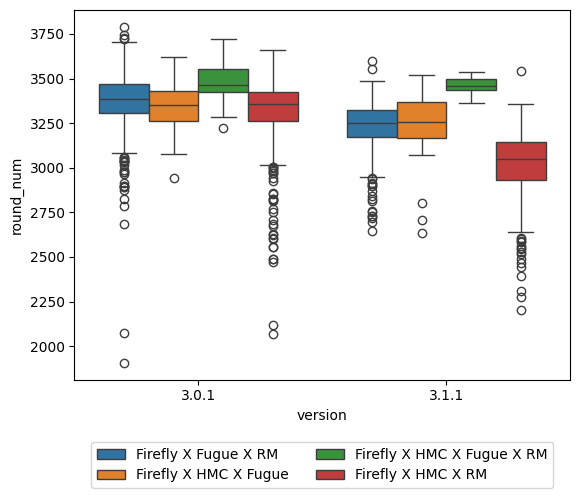

In [12]:
sns.boxplot(x='version', y='round_num', hue='team_leader_adj', data=post_fugue)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

# Memory of Chaos 

In [13]:
df = pd.read_csv('../data/moc.csv')
firefly = df.query('team_leader == "Firefly"').copy()
firefly['pre_fugue'] = firefly['version'] <= '2.7.2'

core_support = ['Imaginary Trailblazer', 'Ruan Mei', 'Fugue', 'Tribbie']

for core in core_support:
    lowered_core = core.lower().replace(' ', '_')
    firefly['has_' + lowered_core] = firefly['team_comp'].str.contains(core)

In [14]:
firefly.groupby('version')['has_imaginary_trailblazer'].mean()

version
2.3.3    0.997027
2.4.3    0.998294
2.5.3    0.997643
2.6.3    0.997989
2.7.3    0.622453
3.0.3    0.439123
3.1.3    0.464352
Name: has_imaginary_trailblazer, dtype: float64

In [15]:
pre_fugue = firefly.query('has_imaginary_trailblazer & has_sustain & cons == 0 & pre_fugue')
pre_fugue_e2 = firefly.query('has_imaginary_trailblazer & has_sustain & cons == 2 & pre_fugue')

Text(0.5, 1.0, "E0 Firefly's Average Performance in MOC")

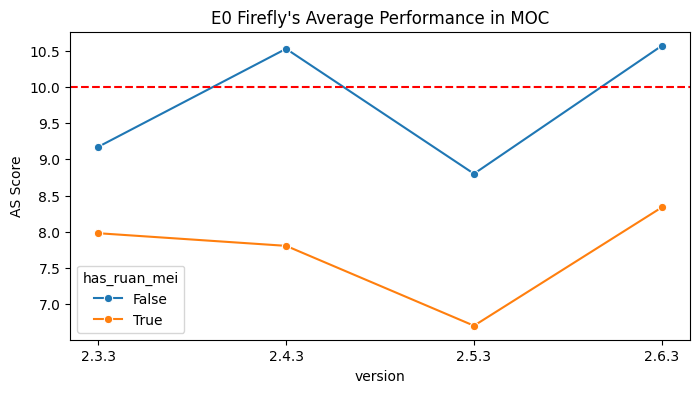

In [16]:
has_ruan_mei = pre_fugue.groupby(['version', 'has_ruan_mei'])['round_num'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x='version', y='round_num', hue='has_ruan_mei', data=has_ruan_mei, marker='o') 
plt.ylabel('AS Score')
plt.axhline(y=10, color='red', linestyle='dashed')
plt.title("E0 Firefly's Average Performance in MOC")


In [17]:
post_fugue = firefly.query('cons == 0 & pre_fugue ==False').copy()

post_fugue['team_leader_adj'] = 'Firefly'
post_fugue.loc[post_fugue['has_imaginary_trailblazer'], 'team_leader_adj'] += ' X HMC'
post_fugue.loc[post_fugue['has_fugue'], 'team_leader_adj'] += ' X Fugue'
post_fugue.loc[post_fugue['has_ruan_mei'], 'team_leader_adj'] += ' X RM'

post_fugue['team_leader_adj'].value_counts()

team_leader_adj
Firefly X Fugue X RM          2371
Firefly X HMC X RM            1802
Firefly X HMC X Fugue X RM     618
Firefly X HMC X Fugue          230
Firefly X Fugue                 19
Firefly X HMC                    6
Firefly X RM                     3
Firefly                          1
Name: count, dtype: int64

In [18]:
mask = post_fugue['team_leader_adj'].str.count(r'\sX\s') >= 2
post_fugue = post_fugue[mask]
post_fugue = post_fugue.sort_values(['version', 'team_leader_adj'])

C:\Users\User\AppData\Local\Temp\ipykernel_22900\2118658162.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='version', y='round_num', hue='team_leader_adj', data=post_fugue, ci=False, marker='o')


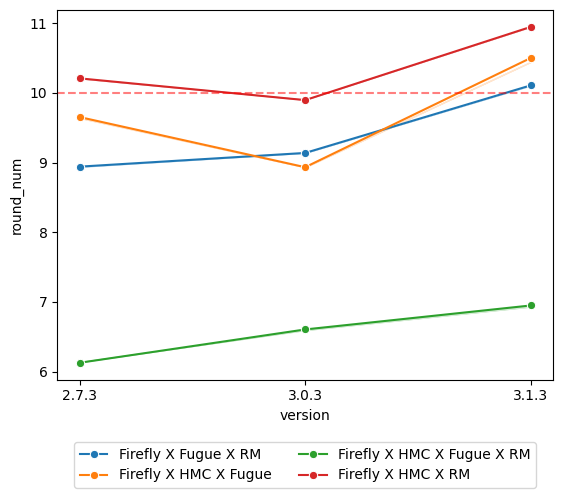

In [19]:
sns.lineplot(x='version', y='round_num', hue='team_leader_adj', data=post_fugue, ci=False, marker='o')
plt.axhline(y=10, color='red', linestyle='dashed', alpha=0.5)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

## Firefly's Eidolons

In [41]:
df = pd.read_csv('../data/as.csv')
firefly = df.query('team_leader == "Firefly"').copy()

for core in core_support:
    lowered_core = core.lower().replace(' ', '_')
    firefly['has_' + lowered_core] = firefly['team_comp'].str.contains(core)

In [42]:
firefly['n_core'] = firefly.loc[:, 'has_imaginary_trailblazer':'has_fugue'].sum(axis=1)
eidolon_data = firefly.query('n_core == 2 & has_sustain').query('cons < 3 | cons == 6')

In [43]:
eidolons_score = eidolon_data.groupby(['version', 'cons'])['round_num'].mean().reset_index()

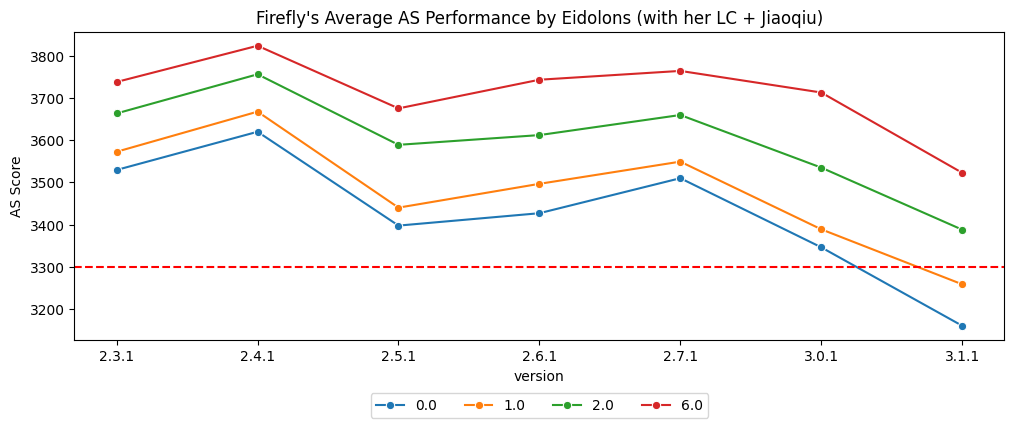

In [48]:
plt.figure(figsize=(12,4))
sns.lineplot(x='version', y='round_num', hue='cons', data=eidolons_score, palette='tab10', marker='o')
plt.axhline(y=3300, color='red', linestyle='dashed')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=4)

plt.title("Firefly's Average AS Performance by Eidolons (with her LC + Jiaoqiu)")
plt.ylabel("AS Score")
plt.show()